# Cluster Analysis using k-prototype algorithm

The k-prototype algorithm is an enhanced version of the classic *k-means* algorithm which is able to handle categorical variables as well and thus broadens the possible applications of this clustering technique.

Suppose we have a set of customers on whom we collected some data, like demographic information, and we would like to perform a segmentation analysis: we are looking to divide the market in well-separated groups characterized by an internal homogeneity with respect to our data. Each of the segment we will identify will feature some distinctive values for the data and consequentially we will be able to choose one or more targets to focus our business on or take action to improve our current performance with effective marketing policies.

For this purpose, we can use cluster analysis and more specifically the k-prototype algorithm.

Let's start by having a look at our data.

In [1]:
options(warn=-1)
data <- read.csv("catalog.csv")
data$rnd1 <- NULL
data$rnd2 <- NULL

In [2]:
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ AmountSpent: int  755 1318 296 2436 1304 495 782 1155 158 3034 ...
 $ Age        : chr  "Old" "Middle" "Young" "Middle" ...
 $ Gender     : chr  "Female" "Male" "Female" "Male" ...
 $ OwnHome    : chr  "Own" "Rent" "Rent" "Own" ...
 $ Married    : chr  "Single" "Single" "Single" "Married" ...
 $ Location   : chr  "Far" "Close" "Close" "Close" ...
 $ Salary     : int  47500 63600 13500 85600 68400 30400 48100 68400 51900 80700 ...
 $ Children   : int  0 0 0 1 0 0 0 0 3 0 ...
 $ History    : chr  "High" "High" "Low" "High" ...
 $ Catalogs   : int  6 6 18 18 12 6 12 18 6 18 ...


In [3]:
head(data)

,AmountSpent,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,755,Old,Female,Own,Single,Far,47500,0,High,6
2,1318,Middle,Male,Rent,Single,Close,63600,0,High,6
3,296,Young,Female,Rent,Single,Close,13500,0,Low,18
4,2436,Middle,Male,Own,Married,Close,85600,1,High,18
5,1304,Middle,Female,Own,Single,Close,68400,0,High,12
6,495,Young,Male,Own,Married,Close,30400,0,Low,6


We have information on 1000 customers of a direct mail catalog company. Most of the variables are self-explanatory and concern demographic traits. *Location* is the distance between the customer's home and the nearest store of the company.
*Catalogs* is the number of catalogs sent to the customer in the latest order he placed.
*History* is a measure of the customer's previous purchase volume (before the latest order).

First, let's convert categorical variables to factors, so that R can recognize them.

In [4]:
categorical <- c("Age", "Gender", "OwnHome", "Married", "Location", "Children", "History")
data[categorical] <- lapply(data[categorical], factor)

In [5]:
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ AmountSpent: int  755 1318 296 2436 1304 495 782 1155 158 3034 ...
 $ Age        : Factor w/ 3 levels "Middle","Old",..: 2 1 3 1 1 3 1 1 1 2 ...
 $ Gender     : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 1 2 1 2 ...
 $ OwnHome    : Factor w/ 2 levels "Own","Rent": 1 2 2 1 1 1 2 1 1 1 ...
 $ Married    : Factor w/ 2 levels "Married","Single": 2 2 2 1 2 1 2 2 1 1 ...
 $ Location   : Factor w/ 2 levels "Close","Far": 2 1 1 1 1 1 1 1 1 2 ...
 $ Salary     : int  47500 63600 13500 85600 68400 30400 48100 68400 51900 80700 ...
 $ Children   : Factor w/ 4 levels "0","1","2","3": 1 1 1 2 1 1 1 1 4 1 ...
 $ History    : Factor w/ 4 levels "High","Low","Medium",..: 1 1 2 1 1 2 3 1 2 4 ...
 $ Catalogs   : int  6 6 18 18 12 6 12 18 6 18 ...


Let's make use of the *k-proto* algorithm.

In order to decide the optimal number of clusters, we are going to evaluate the within-group variance with a scree plot: the elbow point will indicate the most appropriate value for $k$.

In [6]:
library(clustMixType)

# NAs in variables:
AmountSpent         Age      Gender     OwnHome     Married    Location 
          0           0           0           0           0           0 
     Salary    Children     History    Catalogs 
          0           0           0           0 
0 observation(s) with NAs.

Estimated lambda: 553923383 

0 observation(s) with NAs.

# NAs in variables:
AmountSpent         Age      Gender     OwnHome     Married    Location 
          0           0           0           0           0           0 
     Salary    Children     History    Catalogs 
          0           0           0           0 
0 observation(s) with NAs.

Estimated lambda: 553923383 

0 observation(s) with NAs.

# NAs in variables:
AmountSpent         Age      Gender     OwnHome     Married    Location 
          0           0           0           0           0           0 
     Salary    Children     History    Catalogs 
          0           0           0           0 
0 observation(s) with NAs.

Estimate

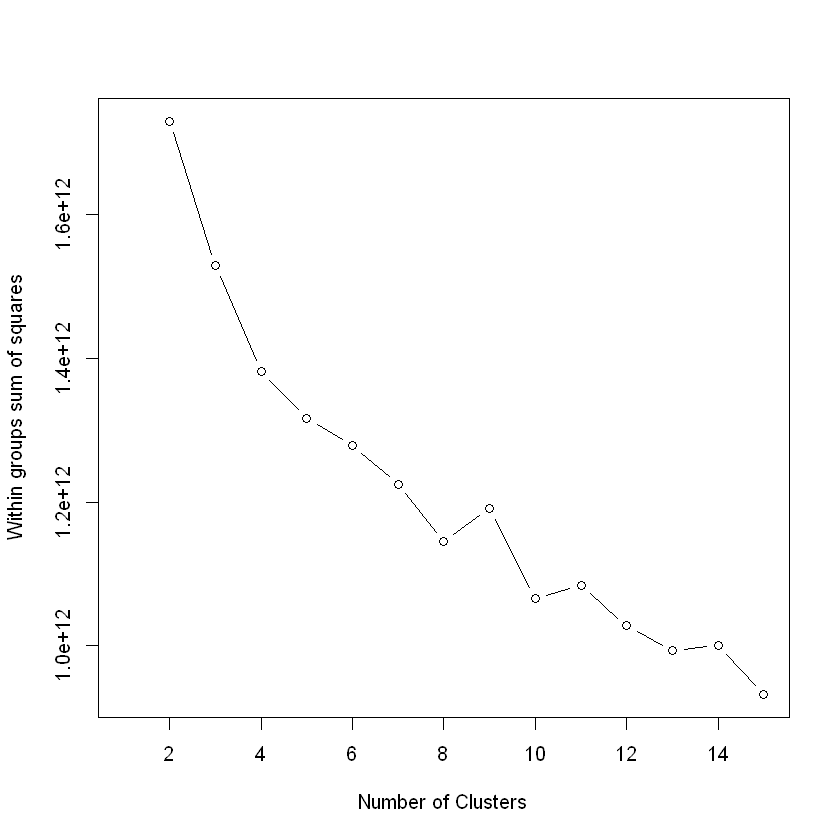

In [7]:
mydata <- data
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
  for (i in 2:15) wss[i] <- sum(kproto(mydata,
                                       k=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

We decide to consider four clusters.

In [8]:
clusters <- kproto(data, k=4)

# NAs in variables:
AmountSpent         Age      Gender     OwnHome     Married    Location 
          0           0           0           0           0           0 
     Salary    Children     History    Catalogs 
          0           0           0           0 
0 observation(s) with NAs.

Estimated lambda: 553923383 

0 observation(s) with NAs.



![results](img/results.png)

Let's try to describe the four clusters we individuated:
- the first cluster is composed of middle-age females with a decent purchase history;
- the second cluster is composed of middle-age males with a high salary and a high purchase history who have just placed a big order: they are arguably our most important customers and we need to do anything in order to keep them;
- the third cluster is composed of middle-age males who, unlike the previous two clusters, rent and mostly have no purchase history: this is the first order for many of them, so they are potential long-term customers we should try to fidelize.
- the fourth cluster is composed of young people, mostly females, and we can see some clear clues on their ages: they rent, are single and have a low salary; additionally, they have a low purchase history and made a small order.

We can also notice that two variables didn't provide valuable insights about the clusters, as their distribution does not differ dramatically between them: they are the distance from the store and the number of children. Were we to conduct a new research, we can safely ignore them. 